# Proyek Machine Learning Terapan (MLT4) - Submission 1 Predictive Analytics

*   Nama : Adita Putri Puspaningrum
*   Link Dataset : https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset



# Data Collection

In [ ]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# Load the dataset
!gdown --id "11vCKuk81QvTQcwibMX7Wo6k4q0HDzLOz"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11vCKuk81QvTQcwibMX7Wo6k4q0HDzLOz
To: /content/House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 75.2MB/s]


In [ ]:
df = pd.read_csv("/content/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Check the Null Values

In [ ]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


(4746, 12)

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


<Axes: xlabel='BHK'>

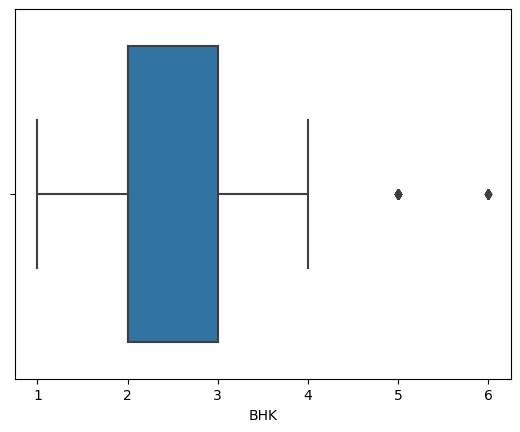

In [ ]:
sns.boxplot(x=df['BHK'])

<Axes: xlabel='Size'>

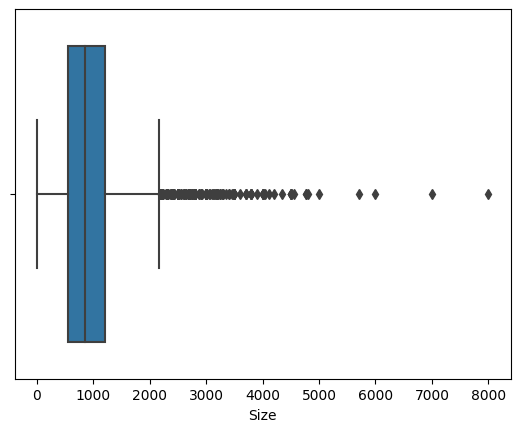

In [ ]:
sns.boxplot(x=df['Size'])

<Axes: xlabel='Bathroom'>

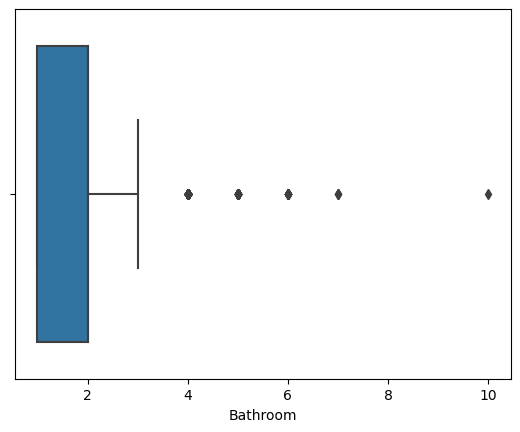

In [ ]:
sns.boxplot(x=df['Bathroom'])

# Remove Outlier

In [ ]:
# Drop kolom Posted On, Floor, Area Locality dan Point of Contact karena tidak mempengaruhi harga sewa
df = df.drop(['Posted On', 'Floor', 'Area Locality'], axis = 'columns')

In [ ]:
df.groupby('City')['City'].agg('count')

City
Bangalore    886
Chennai      891
Delhi        605
Hyderabad    868
Kolkata      524
Mumbai       972
Name: City, dtype: int64

In [ ]:
df.groupby('Furnishing Status')['Furnishing Status'].agg('count')

Furnishing Status
Furnished          680
Semi-Furnished    2251
Unfurnished       1815
Name: Furnishing Status, dtype: int64

In [ ]:
df.groupby('Tenant Preferred')['Tenant Preferred'].agg('count')

Tenant Preferred
Bachelors            830
Bachelors/Family    3444
Family               472
Name: Tenant Preferred, dtype: int64

In [ ]:
df.groupby('Area Type')['Area Type'].agg('count')

Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [ ]:
df.groupby('Point of Contact')['Point of Contact'].agg('count')

Point of Contact
Contact Agent      1529
Contact Builder       1
Contact Owner      3216
Name: Point of Contact, dtype: int64

In [ ]:
# Fitur Area Type hanya memiliki 2 sample Built Area, karena data ini sangat kecil maka sample Built Area tersebut akan dihapus
df.drop(df.index[df['Area Type'] == 'Built Area'], inplace = True)

# Fitur Point of Contact hanya memiliki 1 sample Contact Builder, karena data ini sangat kecil maka sample Contact Builder tersebut akan dihapus
df.drop(df.index[df['Point of Contact'] == 'Contact Builder'], inplace = True)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1 - 1.5 * IQR)) | (df>(Q3 + 1.5 * IQR))).any(axis = 1)]

# Cek ukuran dataset setelah kita drop outliers
df.shape

<ipython-input-18-2a6a2039f064>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-18-2a6a2039f064>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-18-2a6a2039f064>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(Q1 - 1.5 * IQR)) | (df>(Q3 + 1.5 * IQR))).any(axis = 1)]


(4128, 9)

In [ ]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


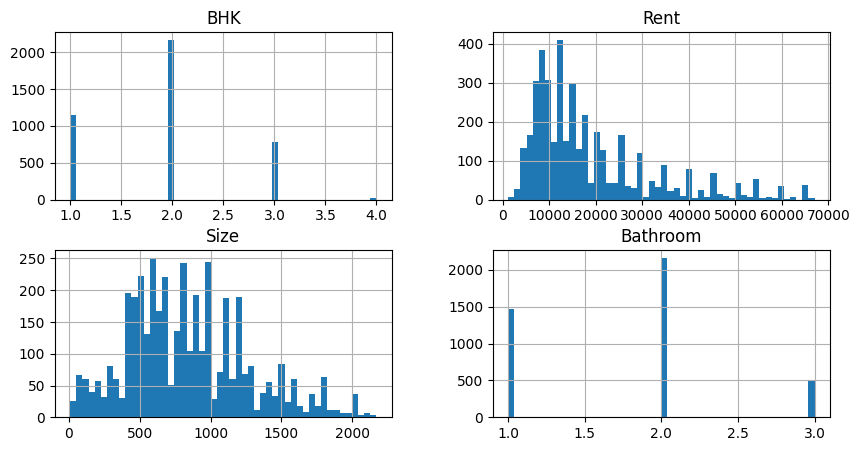

In [ ]:
df.hist(bins=50, figsize=(10,5))
plt.show()

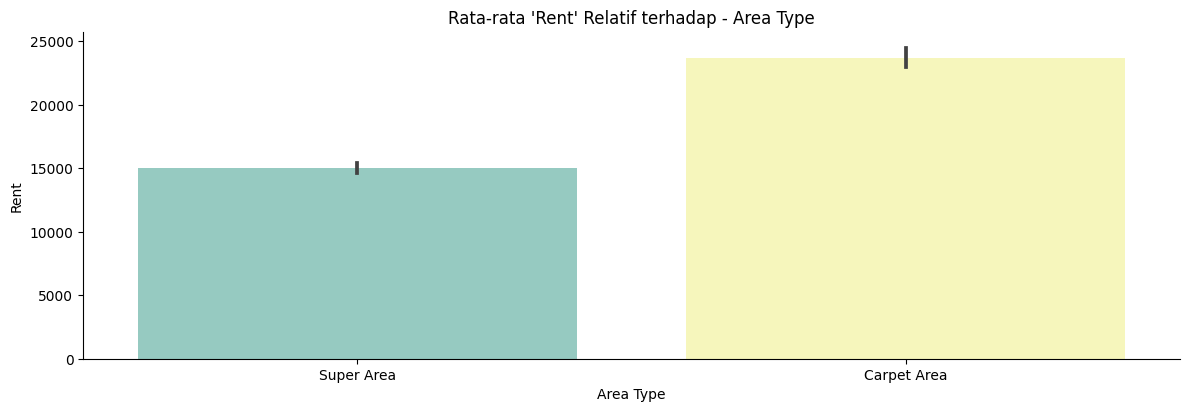

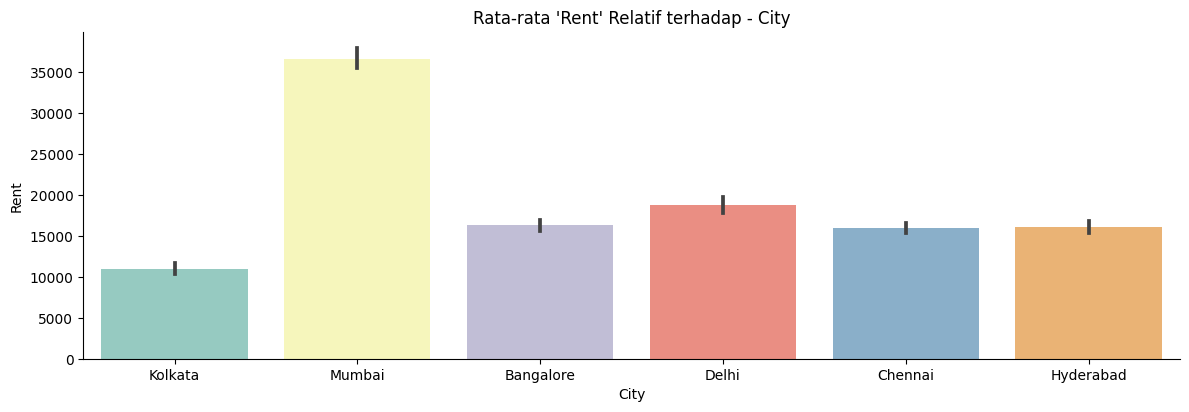

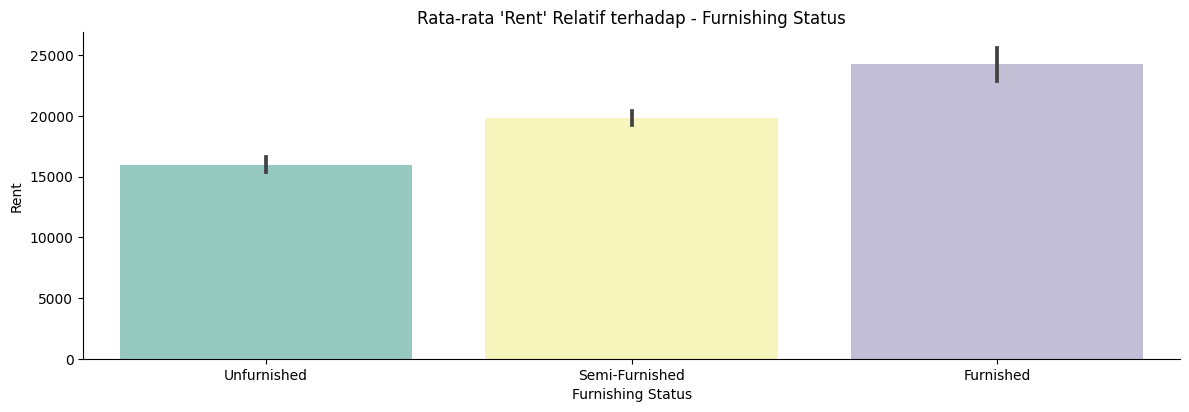

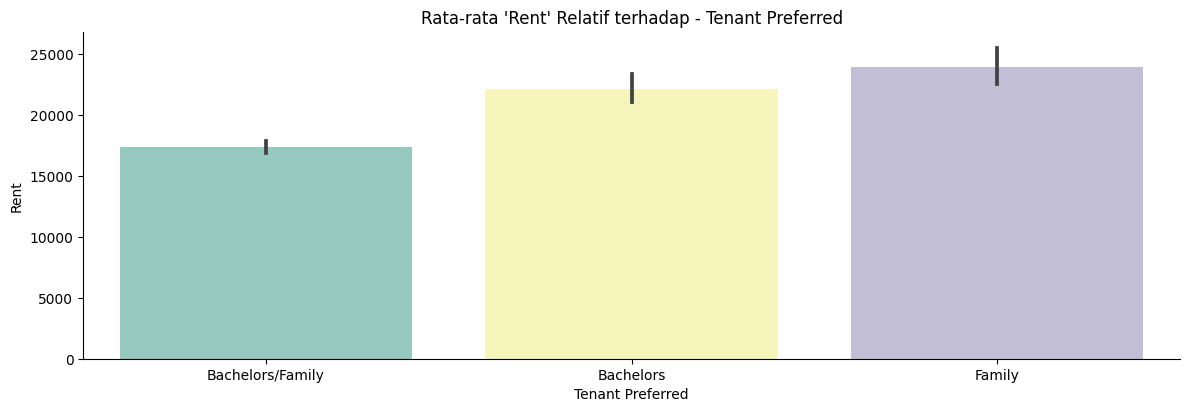

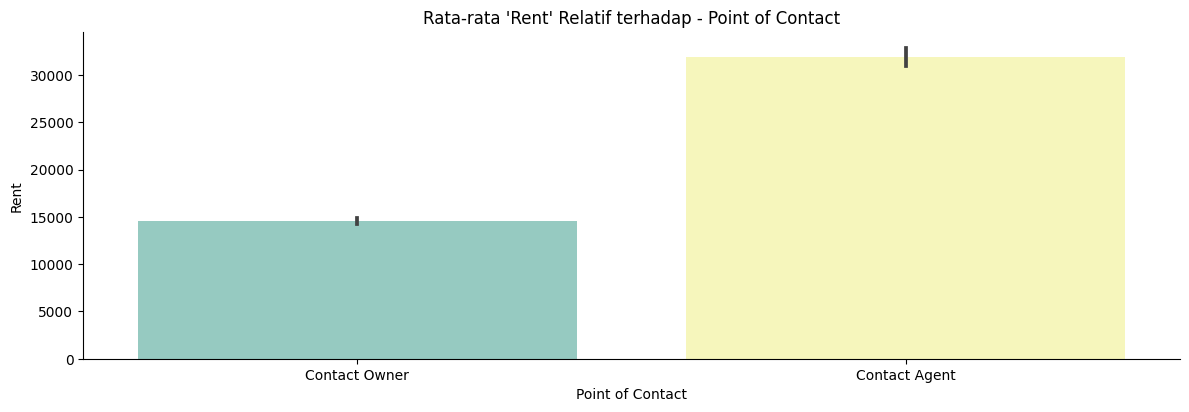

In [ ]:
# Melihat kolerasi antara fitur kategorik dengan fitur target (Rent)
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Rent", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Rent' Relatif terhadap - {}".format(col))

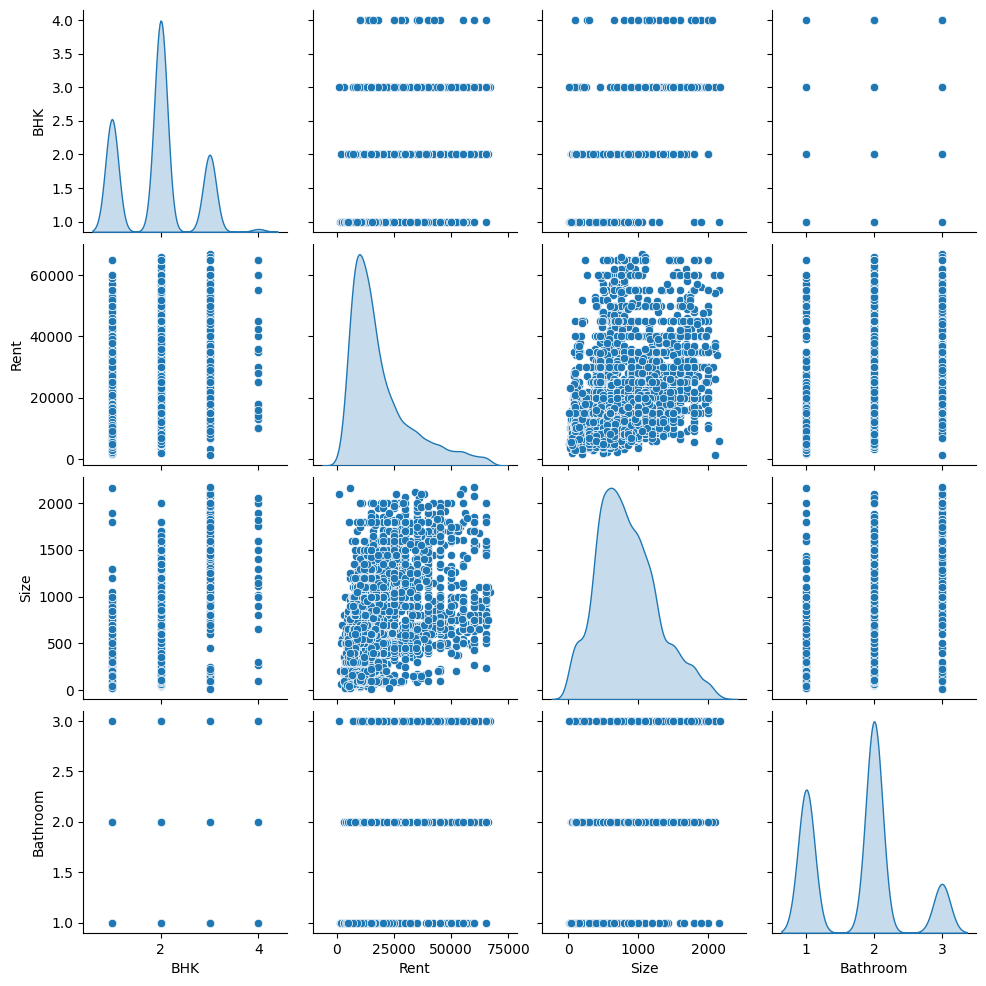

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-23-55e2b04b3706>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

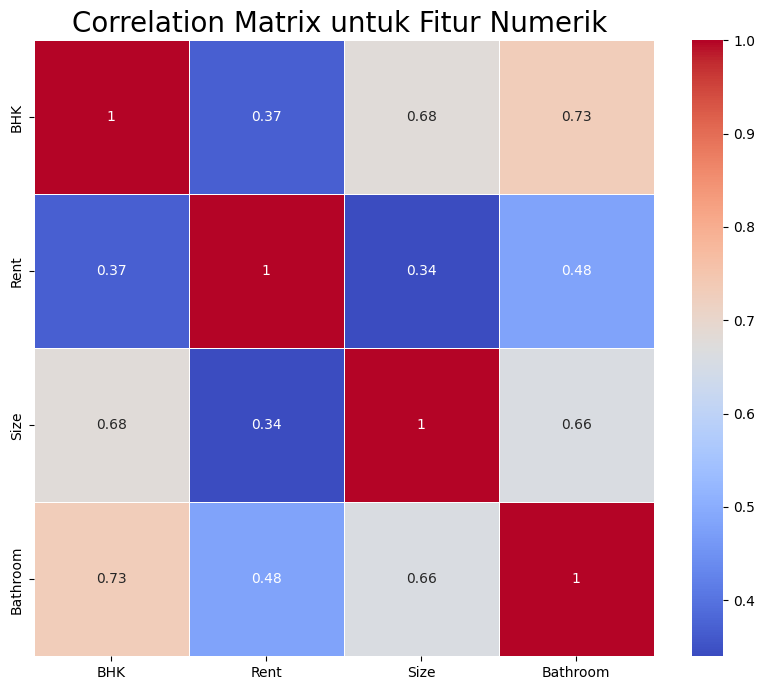

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['Area Type'], prefix='area_type')], axis=1)
df = pd.concat([df, pd.get_dummies(df['City'], prefix='city')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Furnishing Status'], prefix='furnishing_status')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Tenant Preferred'], prefix='tenant_preferred')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Point of Contact'], prefix='point_of_contact')], axis=1)

In [ ]:
df.drop(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'], axis=1, inplace=True)
df.head()

,BHK,Rent,Size,Bathroom,area_type_Carpet Area,area_type_Super Area,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,furnishing_status_Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished,tenant_preferred_Bachelors,tenant_preferred_Bachelors/Family,tenant_preferred_Family,point_of_contact_Contact Agent,point_of_contact_Contact Owner
0,2,10000,1100,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
1,2,20000,800,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
2,2,17000,1000,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
3,2,10000,800,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
4,2,7500,850,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Rent"],axis =1)
y = df["Rent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4128
Total # of sample in train dataset: 3508
Total # of sample in test dataset: 620


## Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data train
numerical_features = ['BHK', 'Size', 'Bathroom']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,BHK,Size,Bathroom
2691,-1.315480,-0.832367,-1.175741
3175,1.535743,2.735962,1.894224
3022,0.110131,-0.902795,-1.175741
3349,1.535743,1.796928,1.894224
74,1.535743,1.562169,0.359242


In [ ]:
X_train[numerical_features].describe().round(4)

,BHK,Size,Bathroom
count,3508.0000,3508.0000,3508.0000
mean,-0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001
min,-1.3155,-1.9123,-1.1757
25%,-1.3155,-0.7854,-1.1757
50%,0.1101,-0.0811,0.3592
75%,0.1101,0.6231,0.3592
max,2.9614,3.1351,1.8942


In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

# Modeling

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['knn', 'rf', 'boosting'])

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 14)
knn.fit(X_train, y_train)
models.loc['train_mse', 'knn'] = knn.score(X_test,y_test)
knn.score(X_test,y_test)

0.700835165412999

In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=40, n_jobs=-1)
rf.fit(X_train, y_train)
models.loc['train_mse', 'rf'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.7620467927210666

In [ ]:
boosting = AdaBoostRegressor(n_estimators = 40, learning_rate = 0.05, random_state = 5)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'boosting'] = boosting.score(X_test,y_test)
boosting.score(X_test,y_test)

0.6552860419866757

# Evaluation

In [ ]:
# Akurasi dari model
models

,knn,rf,boosting
train_mse,0.700835,0.762047,0.655286
test_mse,NaN,NaN,NaN


In [ ]:
# Mean squared error dari model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,48503.16097,56972.672536
RF,21371.358809,45315.587228
Boosting,58512.403931,65647.005189


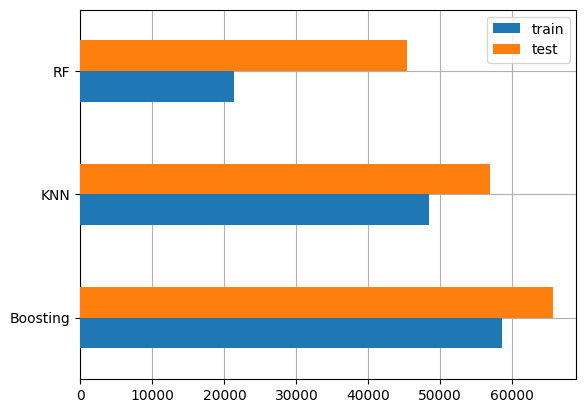

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2735,13500,21785.7,12756.4,19640.2
